# Лабораторная работа №1

## Создание "истории о данных" (Data Storytelling).

### Смыслов Д.О. ИУ5-25М

# Датасет "MyAnimeList - Manga Dataset"

Ссылка на датасет: [MyAnimeList - Manga Dataset на Kaggle](https://www.kaggle.com/datasets/andreuvallhernndez/myanimelist?select=manga.csv)

## Описание

Данный датасет содержит информацию о манге, собранную с сайта [MyAnimeList.net](https://myanimelist.net/) — одного из крупнейших онлайн-ресурсов, посвящённых аниме и манге. Датасет может быть полезен для анализа популярности различных произведений, жанровых предпочтений пользователей, а также для задач рекомендательных систем и анализа пользовательских оценок.

## Основные поля в `manga.csv`:

- **uid** — Уникальный идентификатор манги.
- **title** — Название манги.
- **synopsis** — Краткое описание сюжета.
- **genres** — Жанры, к которым относится манга.
- **type** — Тип (например, Manga, Manhwa, One-shot и др.).
- **volumes** — Количество томов.
- **chapters** — Количество глав.
- **score** — Средний пользовательский рейтинг.
- **scored_by** — Количество пользователей, поставивших оценку.
- **rank** — Рейтинг манги среди всех на сайте.
- **popularity** — Популярность (по количеству добавлений в списки).
- **members** — Количество пользователей, добавивших мангу в списки.
- **favorites** — Количество пользователей, добавивших мангу в избранное.
- **status** — Статус (выпущена, продолжается, приостановлена и т.д.).
- **start_date / end_date** — Даты начала и окончания публикации.

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import squarify
!pip install dython
from dython.nominal import associations
import os

In [6]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/parsed-manga/serializations.xlsx
/kaggle/input/parsed-manga/genres.xlsx
/kaggle/input/parsed-manga/authors.xlsx
/kaggle/input/parsed-manga/themes.xlsx
/kaggle/input/parsed-manga/demographics.xlsx
/kaggle/input/parsed-manga/manga.csv


In [9]:
manga = pd.read_csv('/kaggle/input/parsed-manga/manga.csv')
demo = pd.read_excel('/kaggle/input/parsed-manga/demographics.xlsx', sheet_name='Sheet 1')
author = pd.read_excel('/kaggle/input/parsed-manga/authors.xlsx', sheet_name='Sheet 1')
genre = pd.read_excel('/kaggle/input/parsed-manga/genres.xlsx', sheet_name='Sheet 1')
serial = pd.read_excel('/kaggle/input/parsed-manga/serializations.xlsx', sheet_name='Sheet 1')
theme = pd.read_excel('/kaggle/input/parsed-manga/themes.xlsx', sheet_name='Sheet 1')

In [10]:
manga.head(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,...,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms,jikan
0,2,Berserk,manga,9.45,268737,currently_publishing,NaN,NaN,1989-08-25,NaN,...,"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",['Young Animal'],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,['Berserk: The Prototype'],True
1,13,One Piece,manga,9.20,305917,currently_publishing,NaN,NaN,1997-07-22,NaN,...,"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",['Shounen Jump (Weekly)'],"Gol D. Roger, a man referred to as the ""Pirate...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[],True
2,25,Fullmetal Alchemist,manga,9.05,143879,finished,27.0,116.0,2001-07-12,2010-09-11,...,"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",['Shounen Gangan'],Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"['Full Metal Alchemist', 'Hagane no Renkinjuts...",True
3,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.27,125482,finished,24.0,96.0,2004-01-19,2011-04-19,...,"[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ...",True
4,4632,Oyasumi Punpun,manga,9.03,141146,finished,13.0,147.0,2007-03-15,2013-11-02,...,"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/164...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[],True


In [11]:
manga.describe()

,manga_id,score,scored_by,volumes,chapters,members,favorites
count,67273.000000,21910.000000,67273.000000,50494.000000,47095.000000,67273.000000,67273.000000
mean,77959.681477,6.967913,582.226763,2.888719,20.655144,1464.975042,47.583399
std,47358.181042,0.515890,4775.525577,4.810232,62.487535,9613.747178,924.716631
min,1.000000,2.450000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,28581.000000,6.640000,4.000000,1.000000,5.000000,40.000000,0.000000
50%,87804.000000,6.940000,25.000000,1.000000,9.000000,125.000000,0.000000
75%,118104.000000,7.260000,195.000000,3.000000,18.000000,588.000000,2.000000
max,149667.000000,9.450000,363368.000000,200.000000,6477.000000,590241.000000,103820.000000


In [12]:
manga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67273 entries, 0 to 67272
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manga_id           67273 non-null  int64  
 1   title              67273 non-null  object 
 2   type               67273 non-null  object 
 3   score              21910 non-null  float64
 4   scored_by          67273 non-null  int64  
 5   status             67273 non-null  object 
 6   volumes            50494 non-null  float64
 7   chapters           47095 non-null  float64
 8   start_date         62949 non-null  object 
 9   end_date           51721 non-null  object 
 10  members            67273 non-null  int64  
 11  favorites          67273 non-null  int64  
 12  sfw                67273 non-null  bool   
 13  approved           67273 non-null  bool   
 14  created_at_before  67273 non-null  object 
 15  updated_at         58991 non-null  object 
 16  real_start_date    629

# 1. Гистограмма - плохой пример (неудачное число бакетов)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


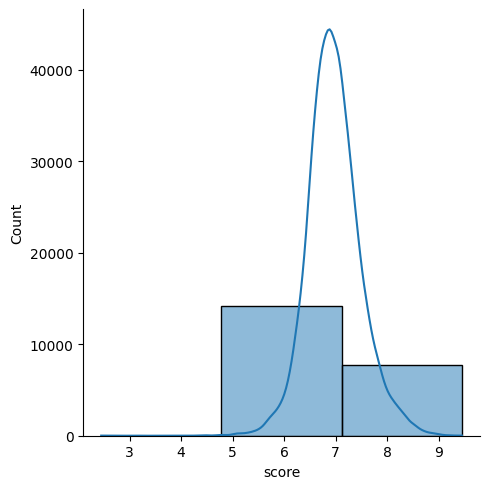

In [43]:
sns.displot(data=manga["score"], kde=True, bins=3)

## Гистограмма - хороший пример (удачное число бакетов)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


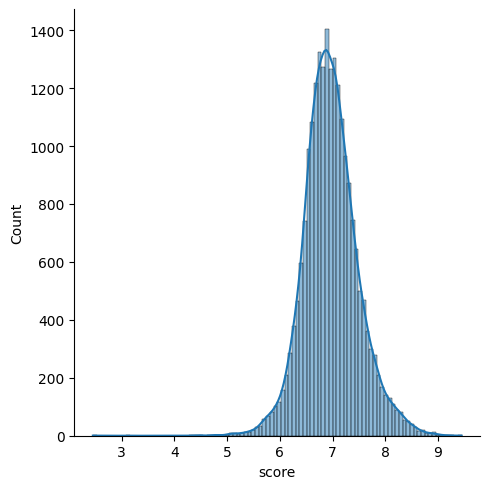

In [44]:
sns.displot(data=manga["score"], kde=True, bins=100)

По построенной гистограмме можно наблюдать, что оценка манги имеет нормальное распределение с средниим значением - 7. Зная примерный вид распределения можно проверить гипотезу о распределении и использовать полученную информацию при дальнейшей обаботке и работе с этим полем

# 2. Ящик с усами - плохой пример (ящики очень похожи)

In [52]:
manga_demos = pd.merge(manga, demo, on='manga_id', how='inner')

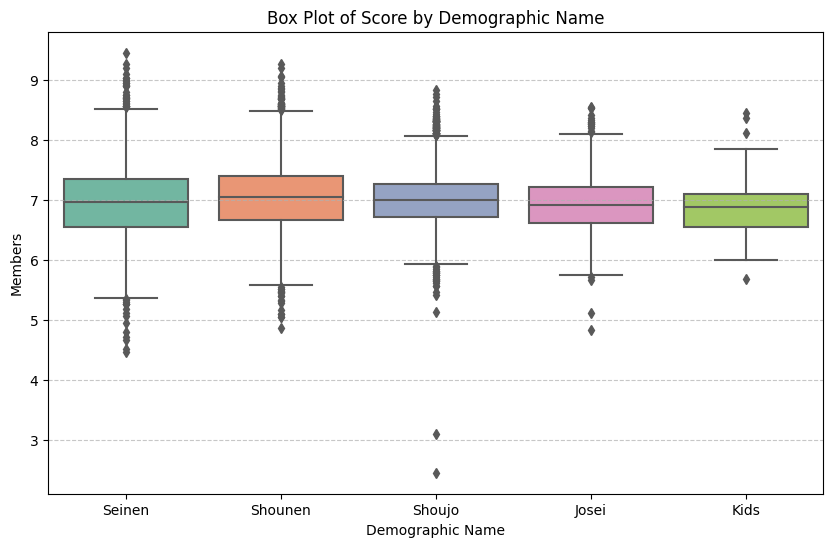

In [60]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.boxplot(x='demographic_name', y='score', data=manga_demos, palette='Set2')  # Use a color palette

# Step 3: Customize the plot
plt.title('Box Plot of Score by Demographic Name')  # Title of the plot
plt.xlabel('Demographic Name')  # Label for x-axis
plt.ylabel('Members')  # Label for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability

# Step 4: Show the plot
plt.show()

# Ящик с усами - хороший пример (теперь видим распределения)

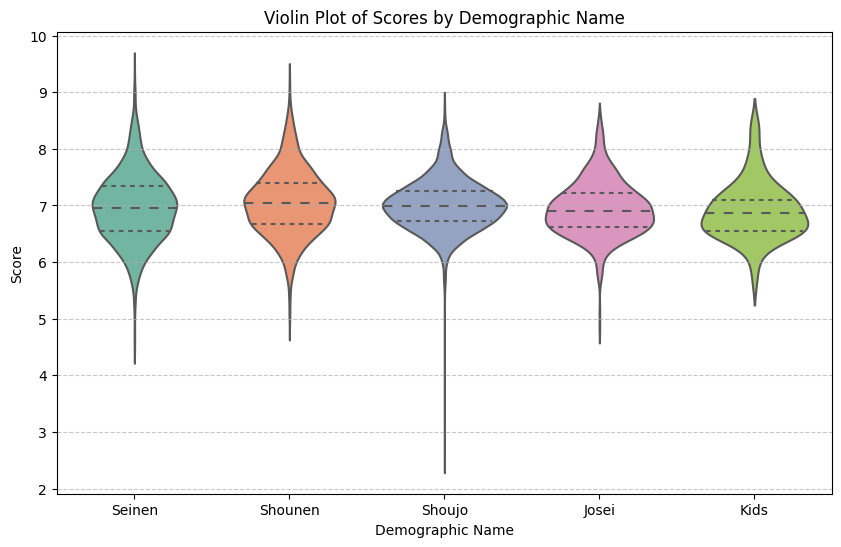

In [76]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.violinplot(x='demographic_name', y='score', data=manga_demos, palette='Set2', inner='quartile')  # Use a color palette

plt.title('Violin Plot of Scores by Demographic Name')  # Title of the plot
plt.xlabel('Demographic Name')  # Label for x-axis
plt.ylabel('Score')  # Label for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability

plt.show()

Violin plot дал большее понимание о распределении значений в каждой из категории, чего не было видно изначально на ящиках с усами.
В данном конкретном случае видим что оценки манги для аудитории Shoujo более сконцентриррованны около среднего, в то время как для Seinen ситуация другая - оно больше размыто по высоте и имеет большую дисперсию

# 3. Scatterplot - плохой пример (не видно различий категорий)

<Axes: xlabel='members', ylabel='favorites'>

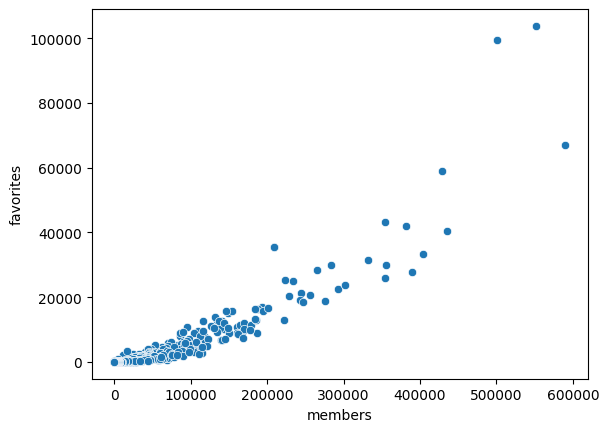

In [105]:
sns.scatterplot(x=manga_demos["members"], y=manga_demos["favorites"])

# Scatterplot - Хороший пример (видны различия категорий)

<Axes: xlabel='members', ylabel='favorites'>

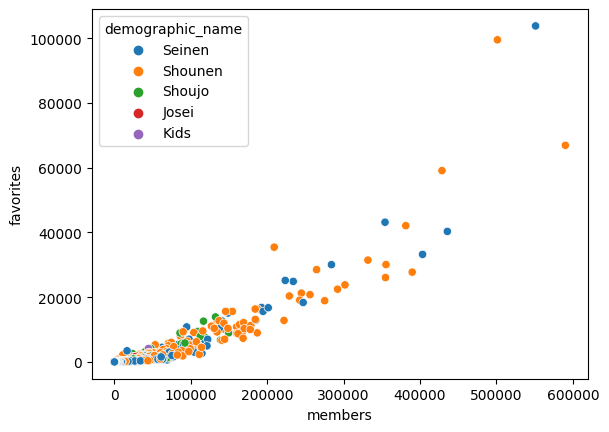

In [107]:
sns.scatterplot(x=manga_demos["members"], y=manga_demos["favorites"], hue=manga_demos["demographic_name"])

По данной диаграмме рассеяния мы можем наблюдать, что Seinen и Shounen обладают большим числом участников в группах манги и что этот показатель прямо коррелирует с количеством конкретной манги в избранном у пользователей.

Для других категорий корреляция выражена слабее или просто коэффициент слишком мал, а сами они сконцетрированы в левой части графика

# 4. Pie plot - плохой пример (тяжело различить значения)

In [111]:
manga_genres = pd.merge(manga, genre, on='manga_id', how='inner')
# genre_name

In [113]:
grouped_data = manga_genres.groupby('genre_name')['members'].sum().reset_index()

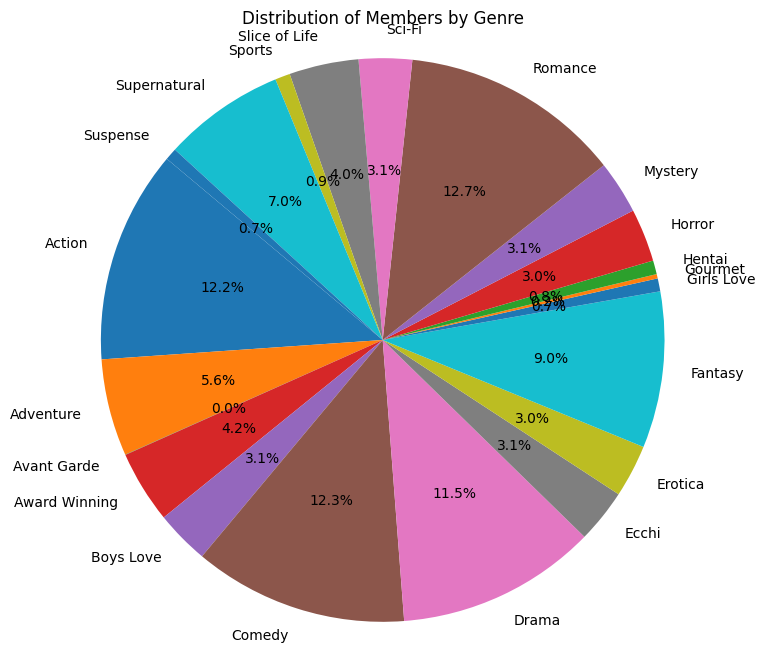

In [115]:
# Step 4: Create the pie plot
plt.figure(figsize=(8, 8))  # Set the size of the plot
plt.pie(grouped_data['members'], labels=grouped_data['genre_name'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)

# Step 5: Customize the plot
plt.title('Distribution of Members by Genre')  # Title of the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Step 6: Show the plot
plt.show()

# Tree map plot - хороший пример

In [120]:
import plotly.express as px

In [126]:
fig = px.treemap(grouped_data,
                 path=['genre_name'],  # Hierarchy for the treemap
                 values='members',     # Values to size the boxes
                 title='Treemap of Members by Genre')
fig.show()

# 4. Correlation map - плохой пример

In [154]:
data = pd.merge(manga, demo, on="manga_id", how="inner", validate="m:m")
data = pd.merge(author, data, on="manga_id", how="inner", validate="m:m")
data = pd.merge(genre, data, on="manga_id", how="inner", validate="m:m")
data = pd.merge(theme, data, on="manga_id", how="inner", validate="m:m")
data = pd.merge(serial, data, on="manga_id", how="inner", validate="m:m")

data['author_name'] = data['author/first_name'] + ' ' + data['author/last_name']

columns_to_drop = [
    'jikan',
    'approved',
    'created_at_before',
    'updated_at',
    'real_start_date',
    'real_end_date',
    'genres',
    'themes',
    'demographics',
    'authors',
    'serializations',
    'synopsis',
    'background',
    'main_picture',
    'url',
    'volumes',
    'chapters',
    'title_english',
    'title_japanese',
    'title_synonyms',
    'author/id',
    'author/first_name',
    'author/last_name',
    'author/role',
]
data.drop(columns_to_drop, axis=1, inplace=True)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15370 entries, 56 to 19973
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   manga_id          15370 non-null  int64  
 1   seria             15370 non-null  object 
 2   theme_name        15370 non-null  object 
 3   genre_name        15370 non-null  object 
 4   title             15370 non-null  object 
 5   type              15370 non-null  object 
 6   score             15370 non-null  float64
 7   scored_by         15370 non-null  int64  
 8   status            15370 non-null  object 
 9   start_date        15370 non-null  object 
 10  end_date          15370 non-null  object 
 11  members           15370 non-null  int64  
 12  favorites         15370 non-null  int64  
 13  sfw               15370 non-null  bool   
 14  demographic_name  15370 non-null  object 
 15  author_name       15370 non-null  object 
dtypes: bool(1), float64(1), int64(4), object(10)

In [155]:
categorical_columns =[
    'type', 'status', 'sfw', 'seria',
    'start_date', 'end_date', 'title',
    'theme_name', 'demographic_name',
    'author_name', 'genre_name'
]

In [156]:
res_corr = associations(data, nominal_columns=categorical_columns, cmap='RdBu_r',
                        title='Матрица корреляции и зависимости атрибутов',
                        clustering=True, figsize=(18,18), plot=False, compute_only=True)

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning:

invalid value encountered in less



<Axes: >

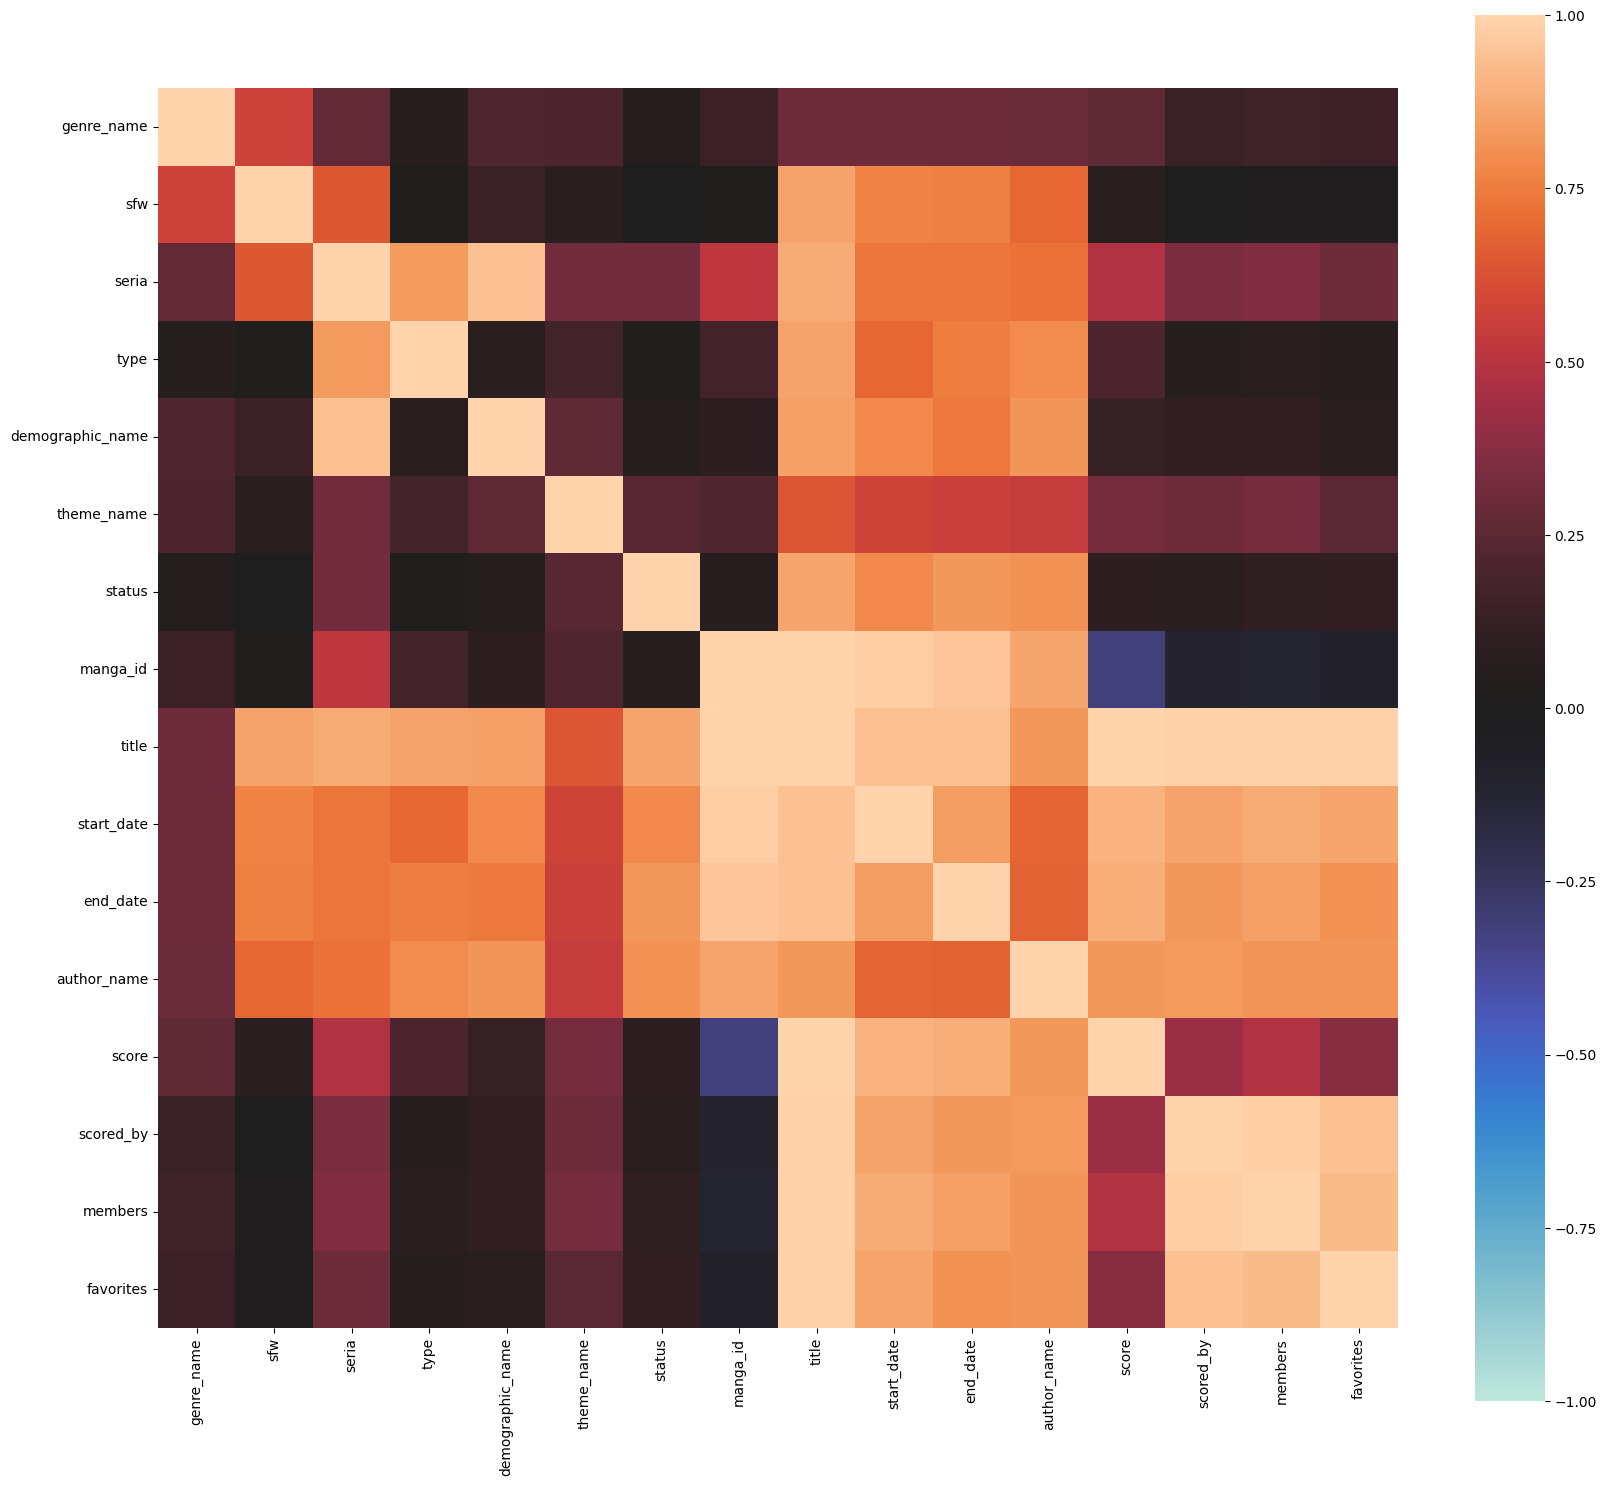

In [157]:
corr_matrix=res_corr['corr']
plt.figure(figsize=(20,18))
sns.heatmap(corr_matrix, square=True, center=0, vmin=-1.0, vmax=1.0)

# Correlation map - хороший пример

In [158]:
data.drop(['manga_id', 'title', 'start_date', 'end_date', 'scored_by', 'members', 'favorites'], axis=1, inplace=True)

In [159]:
res_corr = associations(data, nominal_columns=categorical_columns, cmap='RdBu_r',
                        title='Матрица корреляции и зависимости атрибутов',
                        clustering=True, figsize=(18,18), plot=False, compute_only=True)

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning:

invalid value encountered in less



<Axes: >

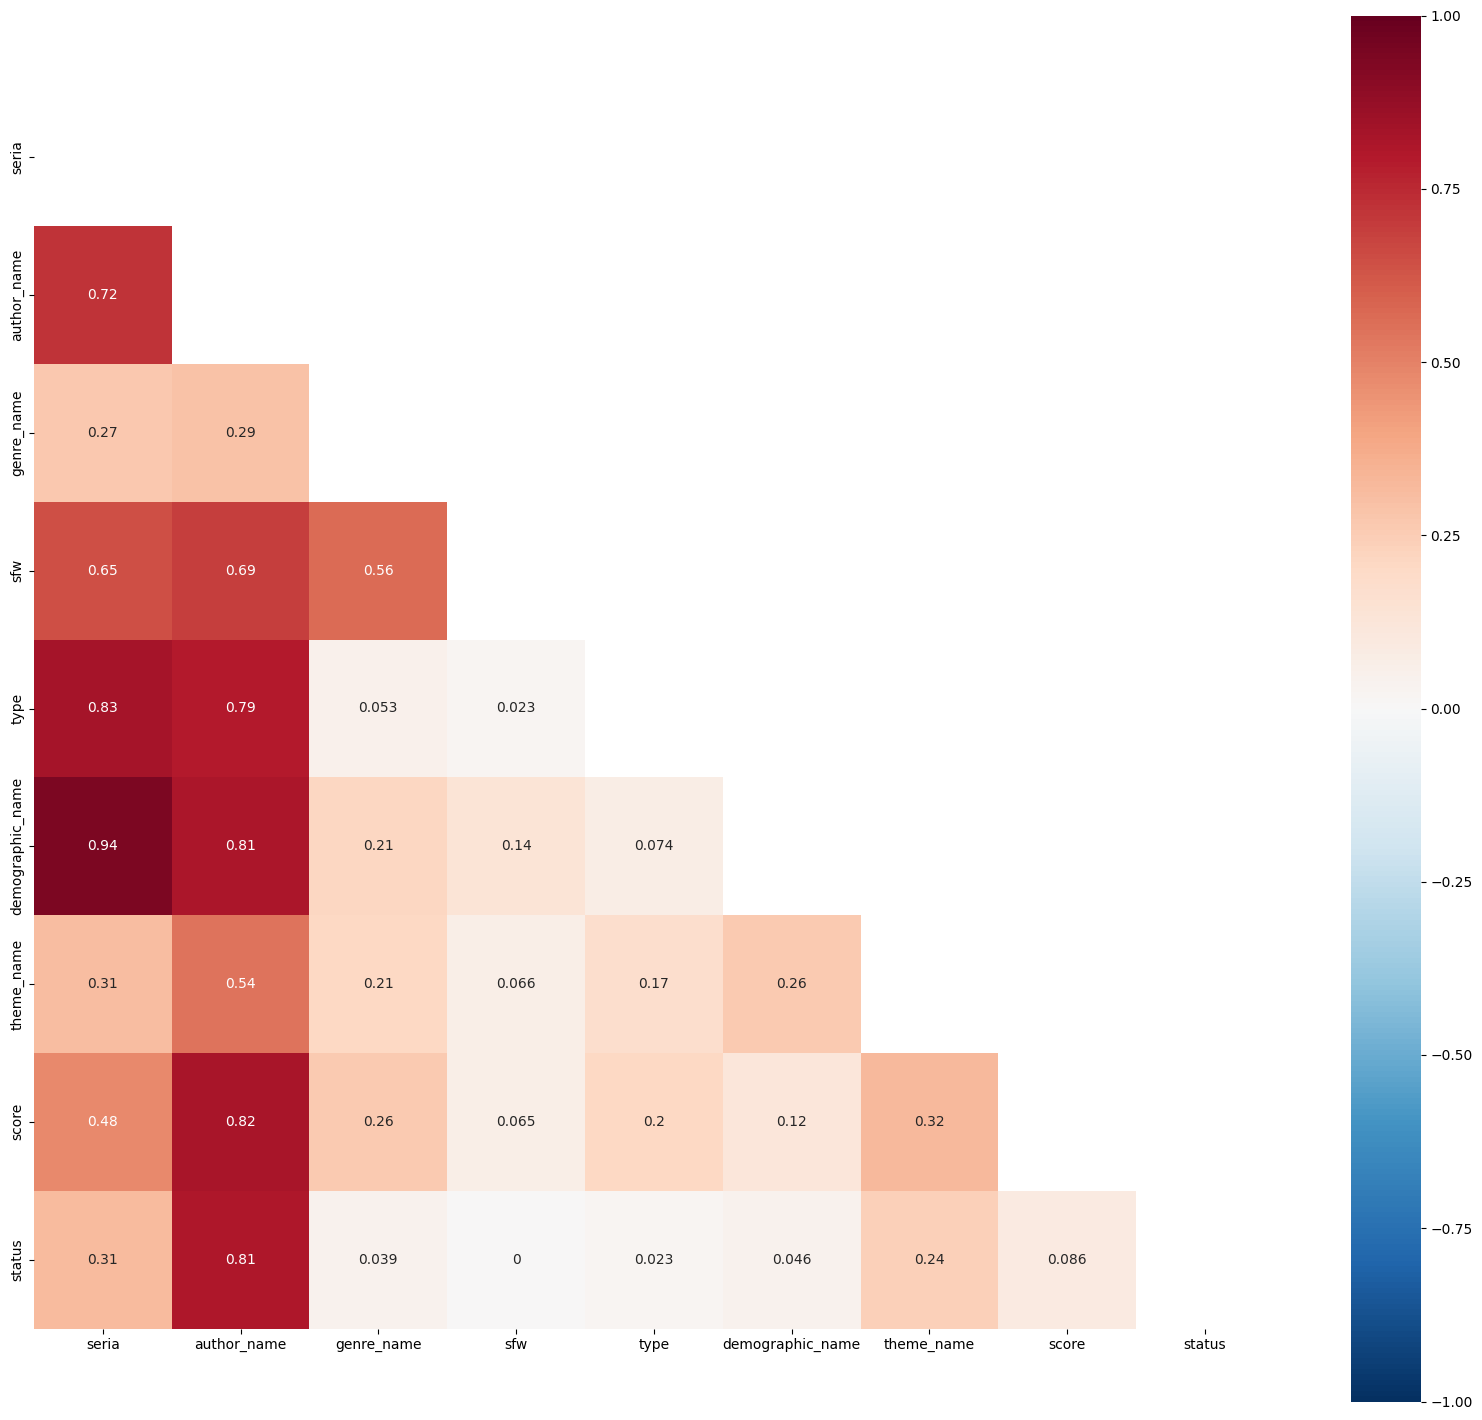

In [160]:
corr_matrix=res_corr['corr']
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,18))
sns.heatmap(corr_matrix, mask=mask, square=True, center=0, cmap='RdBu_r', annot=True, vmin=-1.0, vmax=1.0)